In [ ]:
! pip install pylatexenc

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 KB 7.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136833 sha256=2d821c22cfae1887707d22102a27ad2a71b457356a65319ac3299ba96175c398
  Stored in directory: /root/.cache/pip/wheels/72/99/be/81d9bcdf5dd5ee5acd8119a9dd5bc07204c9ce205fd341b021
Successfully built pylatexenc


In [ ]:
! pip install "git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/qiskit-community/qiskit-textbook.git to /tmp/pip-req-build-ugmd1hbt
  Running command git clone --filter=blob:none --quiet https://github.com/qiskit-community/qiskit-textbook.git /tmp/pip-req-build-ugmd1hbt
  Resolved https://github.com/qiskit-community/qiskit-textbook.git to commit 85ba91fef057a425cd2cb7ce58999e9334b75f4c
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 64.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 79.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 94.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.4/240.4 KB 32.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 KB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 KB 8.5 M

In [ ]:
from qiskit import IBMQ, assemble, transpile
from qiskit.tools.monitor import job_monitor

In [ ]:
TOKEN="5c68361d5b9e2c398434de7d981228d3556831658cded8c26a033c8ac53da6315d5323659c57a779fe4630f4fd9d3104ad65483f905c39767a8c8d30caa5a94f"
IBMQ.save_account(TOKEN)
IBMQ.load_account() # Load account from disk
# IBMQ.providers() 

<ipython-input-4-60f6cfa87577>:2: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  IBMQ.save_account(TOKEN)


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [ ]:
from qiskit import *
from qiskit.providers.aer import AerSimulator

In [ ]:
from qiskit import QuantumRegister, ClassicalRegister, Aer, BasicAer, QuantumCircuit, execute
from qiskit.visualization import plot_histogram
from qiskit.providers.aer import QasmSimulator,StatevectorSimulator
from qiskit.visualization import plot_state_city,circuit_drawer
from qiskit.quantum_info import Statevector
import numpy as np

####Quantum Circuit for Encryption Algorithm of smallGIFT

In [ ]:
def smallGIFT(block_size, key_size):
  qreg = QuantumRegister(block_size, 'q')
  circuit = QuantumCircuit(qreg, name="smallGIFT")

  #############First S-box#################
  circuit.ccx(qreg[0], qreg[2], qreg[1])
  circuit.ccx(qreg[3], qreg[1], qreg[0])
  circuit.x(qreg[0])
  circuit.x(qreg[1])
  circuit.ccx(qreg[0], qreg[1], qreg[2])
  circuit.x(qreg[0])
  circuit.x(qreg[1])
  circuit.x(qreg[2])
  circuit.cx(qreg[2], qreg[3])
  circuit.x(qreg[3])
  circuit.cx(qreg[3], qreg[1])
  circuit.x(qreg[1])
  circuit.ccx(qreg[0], qreg[1], qreg[2])
  circuit.swap(qreg[0],qreg[3])

  #############Second S-box#################
  circuit.ccx(qreg[4+0], qreg[4+2], qreg[4+1])
  circuit.ccx(qreg[4+3], qreg[4+1], qreg[4+0])
  circuit.x(qreg[4+0])
  circuit.x(qreg[4+1])
  circuit.ccx(qreg[4+0], qreg[4+1], qreg[4+2])
  circuit.x(qreg[4+0])
  circuit.x(qreg[4+1])
  circuit.x(qreg[4+2])
  circuit.cx(qreg[4+2], qreg[4+3])
  circuit.x(qreg[4+3])
  circuit.cx(qreg[4+3], qreg[4+1])
  circuit.x(qreg[4+1])
  circuit.ccx(qreg[4+0], qreg[4+1], qreg[4+2])
  circuit.swap(qreg[4+0],qreg[4+3])

  #############Permutation#################
  circuit.swap(qreg[1], qreg[3])
  circuit.swap(qreg[1], qreg[7])
  circuit.swap(qreg[2], qreg[5])
  circuit.swap(qreg[2], qreg[4])

  # #############Key Addition#################
  # circuit.cx(qreg[8],qreg[0])
  # circuit.cx(qreg[9],qreg[4])
  # circuit.cx(qreg[10],qreg[1])
  # circuit.cx(qreg[11],qreg[5])

  return circuit

# circuit_drawer(circuit, output='mpl')

#### oracle for creating distribution z= (x,F(x))  
where F() is the cipher

In [ ]:
def oracle_smallGIFT(block_size):
  qreg = QuantumRegister((block_size)*2, 'q')
  offset=block_size
  circuit = QuantumCircuit(qreg, name="oracle_smallGIFT_distribution")

  for i in range(offset):
    circuit.h(i)
    circuit.cx(i,offset+i)

  circuit.append(smallGIFT(block_size, key_size),range(offset))

  return circuit
  # the circuit now is F(x), x

In [ ]:
block_size = 8
key_size = 4

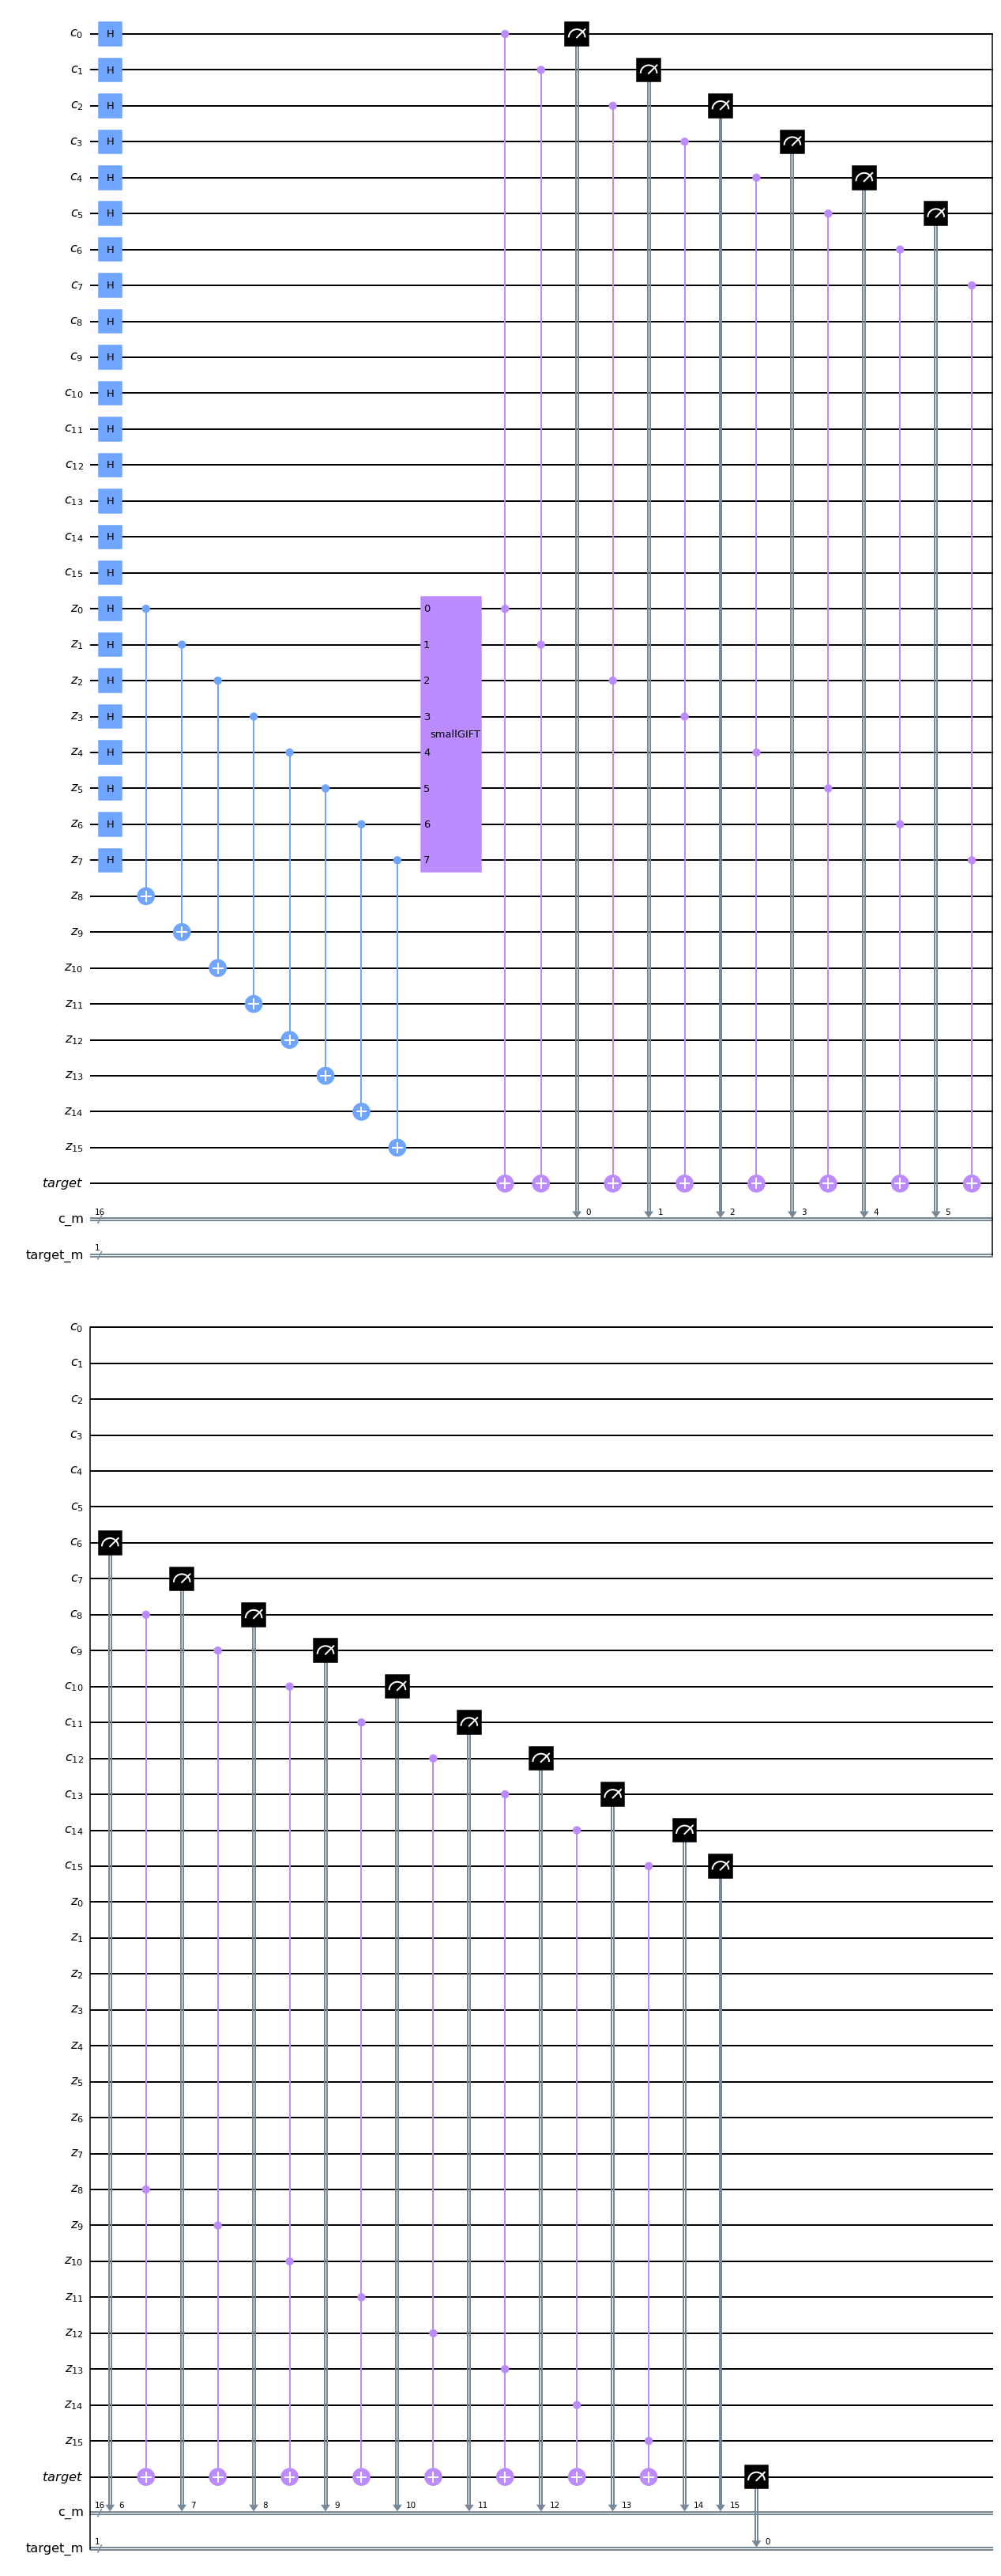

In [ ]:
qreg_c = QuantumRegister(block_size*2, 'c')
qreg_z = QuantumRegister(block_size*2, 'z')
qreg_t = QuantumRegister(1, 'target')

creg_c = ClassicalRegister(block_size*2, 'c_m')
creg_t = ClassicalRegister(1, 'target_m')
circuit = QuantumCircuit(qreg_c,qreg_z, qreg_t, creg_c, creg_t)


# all C in superposition
circuit.h(range(block_size*2))

# superposition over subspace of Z
circuit.append(oracle_smallGIFT(block_size), range(block_size*2, block_size*4))

for i in range(block_size*2):
  circuit.ccx(qreg_c[i], qreg_z[i], qreg_t)

for i in range(block_size*2):
  circuit.measure(qreg_c[i], creg_c[i])

circuit.measure(qreg_t, creg_t)

# circuit_drawer(circuit, output='mpl')
circuit.decompose(gates_to_decompose='oracle_smallGIFT_distribution').draw(output='mpl')
# the structure now is.... |c> |F(x)> |x>

In [ ]:
# circuit_drawer(circuit, output='mpl')

In [ ]:
provider=IBMQ.get_provider('ibm-q')
backend = provider.get_backend('simulator_mps')

transpiled = transpile(circuit, backend=backend)

job = execute(transpiled, backend, shots=10);

job_monitor(job)

Job Status: job has successfully run


10 min = 500 shots  
14 min = 1000 shots  

In [ ]:
result = job.result()
counts = result.get_counts()
counts

{'1 0000000111011110': 1,
 '1 0000001100010110': 1,
 '1 0000001100010111': 1,
 '1 0000001100100000': 1,
 '1 0000001101011111': 1,
 '1 0000001111011101': 1,
 '1 0000010101010101': 1,
 '1 0000010101110101': 1,
 '1 0000011000100001': 1,
 '1 0000011001010101': 1,
 '1 0000011101000100': 1,
 '1 0000011110001100': 1,
 '1 0000011111001011': 1,
 '1 0000100011011000': 1,
 '1 0000100011110110': 1,
 '1 0000100101000101': 1,
 '1 0000101010000011': 1,
 '1 0000101011000000': 1,
 '1 0000101110000101': 1,
 '1 0000101111000001': 1,
 '1 0000101111010001': 1,
 '1 0000101111100010': 1,
 '1 0000101111111000': 1,
 '1 0000110000001111': 1,
 '1 0000110010100010': 1,
 '1 0000110011111100': 1,
 '1 0000110110010101': 1,
 '1 0000111011101101': 1,
 '1 0000111110111001': 1,
 '1 0000111111111111': 1,
 '1 0001000001010110': 1,
 '1 0001000101000100': 1,
 '1 0001000111111111': 1,
 '1 0001001000010000': 1,
 '1 0001010001101000': 1,
 '1 0001010001111100': 1,
 '1 0001010010100011': 1,
 '1 0001010101001001': 1,
 '1 00010101

In [ ]:
# if using local simulator

# # simulator = AerSimulator(method='matrix_product_state')  
# simulator=Aer.get_backend('aer_simulator_matrix_product_state')
# # simulator = AerSimulator(method='statevector')

# # Run and get counts, using the matrix_product_state method
# tcirc = transpile(circuit, simulator)
# # n_shots=1024
# result = simulator.run(tcirc, shots=10).result()
# counts = result.get_counts(0)